# Introduction
* This example implements the Vision Transformer (ViT) model by Alexey Dosovitskiy et al. for image classification, and demonstrates it on the CIFAR-100 dataset. The ViT model applies the Transformer architecture with self-attention to sequences of image patches, without using convolution layers.



In [28]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report
)


os.environ["KERAS_BACKEND"] = "tensorflow"  
import tensorflow as tf
import keras
from keras import layers
from keras import ops
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import seaborn as sns

%matplotlib inline

# Prepare Dataset

In [2]:
train_image="/kaggle/input/time-image-datasetclassification/train/"
valid_image="/kaggle/input/time-image-datasetclassification/valid/"

test_image="/kaggle/input/time-image-datasetclassification/test/"

# Visualize some images from train data

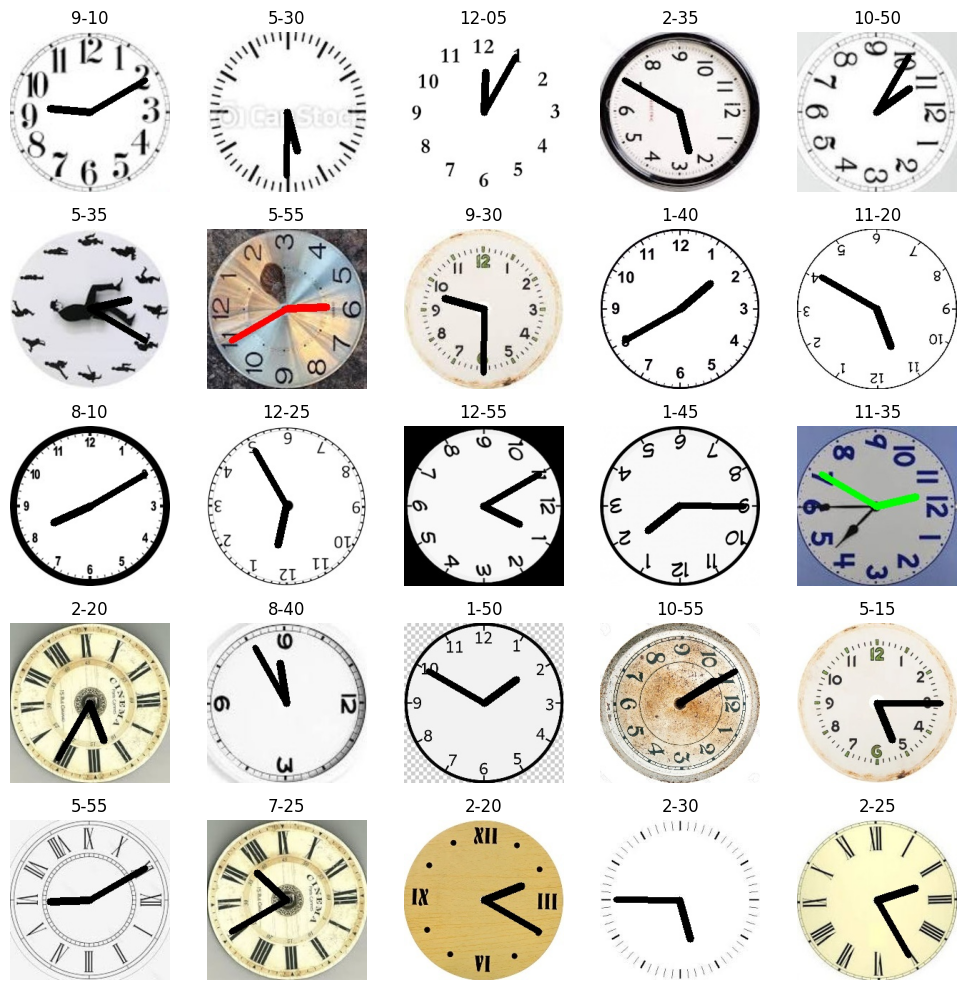

In [3]:
image_files=[]
for root,dirs,files in os.walk(train_image):
    for file in files:
        if file.endswith((".jpg",".jpeg",".png")):
            image_files.append(os.path.join(root,file))
            
sample_size=min(25,len(image_files))
sample_images=random.sample(image_files,sample_size)

fig,axes=plt.subplots(5,5,figsize=(10,10))
axes=axes.flatten()

for i,img_file in enumerate(sample_images):
    img_path=os.path.join(train_image,img_file)
    img=mpimg.imread(img_path)
    label=img_file.split("/")[-2]
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis("off")


plt.tight_layout()
plt.show()

# Plot some Images from Valid dataset

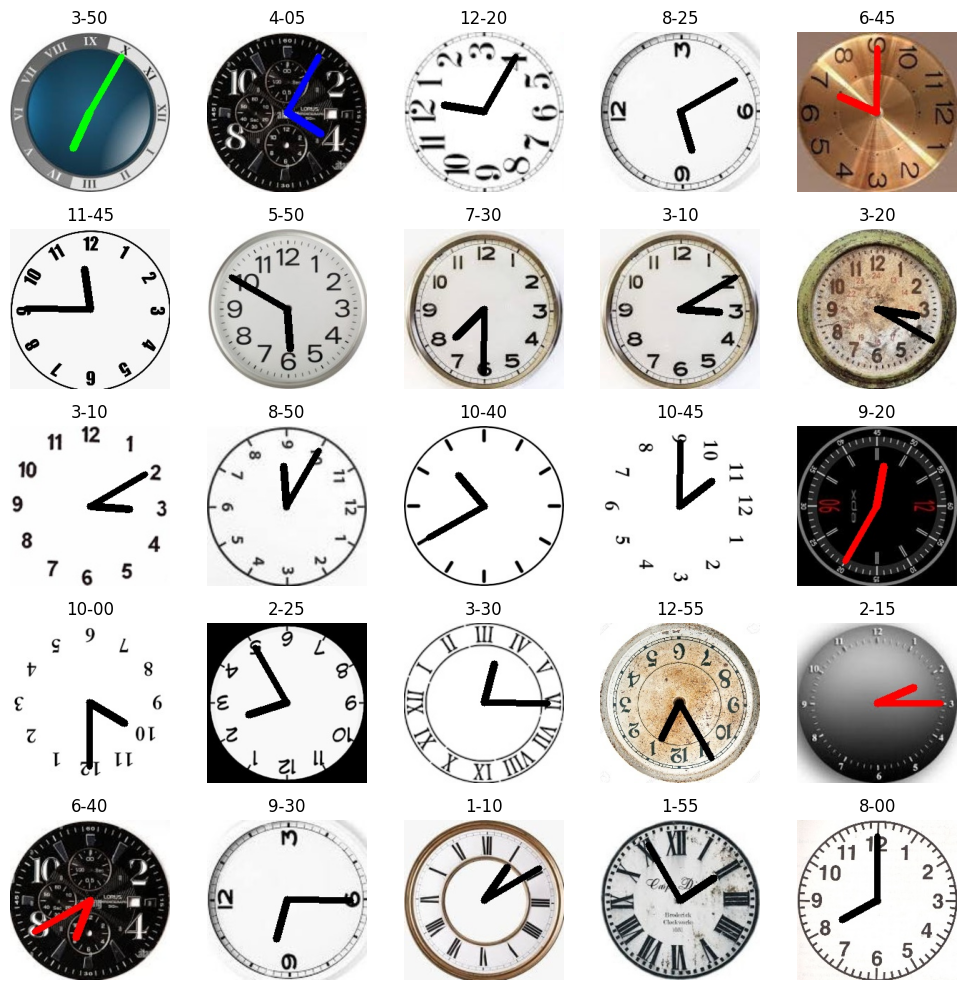

In [4]:
image_files=[]
for root,dirs,files in os.walk(valid_image):
    for file in files:
        if file.endswith((".jpg",".jpeg",".png")):
            image_files.append(os.path.join(root,file))
            
sample_size=min(25,len(image_files))
sample_images=random.sample(image_files,sample_size)

fig,axes=plt.subplots(5,5,figsize=(10,10))
axes=axes.flatten()

for i,img_file in enumerate(sample_images):
    img_path=os.path.join(valid_image,img_file)
    img=mpimg.imread(img_path)
    label=img_file.split("/")[-2]
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis("off")


plt.tight_layout()
plt.show()

# Visualize Some Images From Test Data

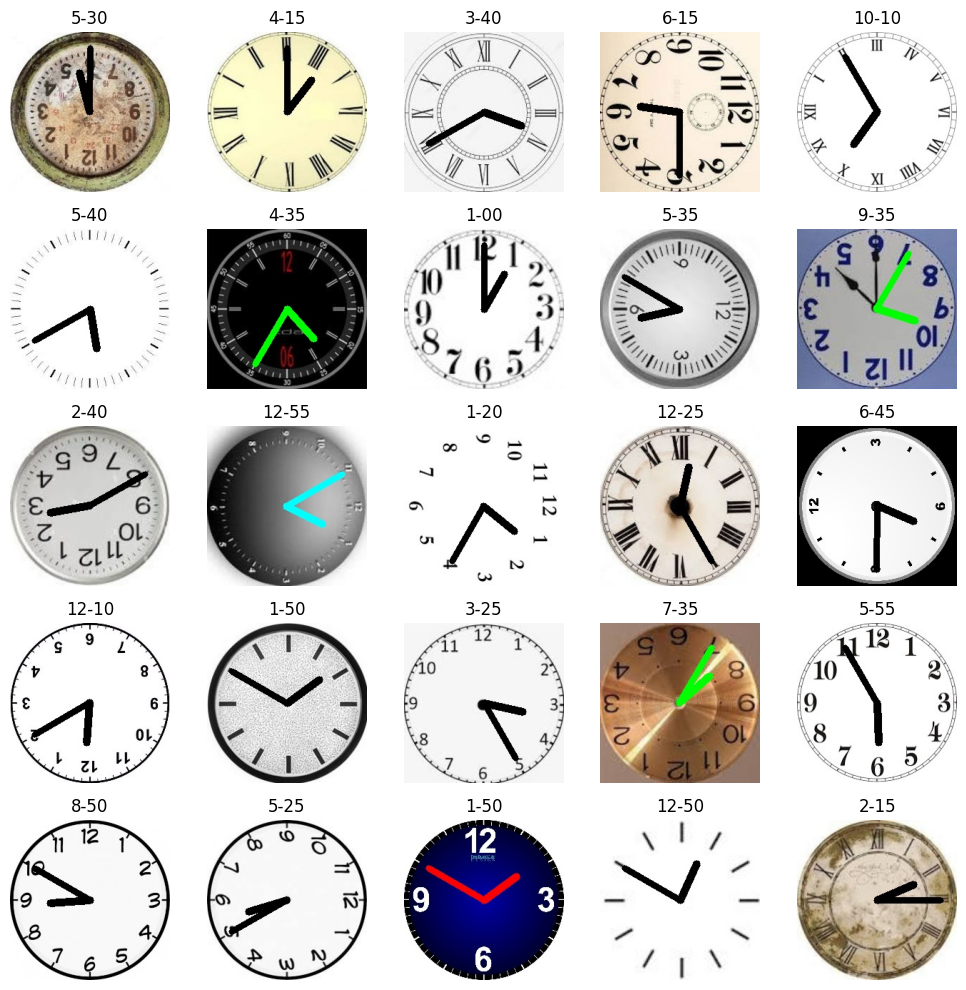

In [5]:
image_files=[]
for root,dirs,files in os.walk(test_image):
    for file in files:
        if file.endswith((".jpg",".jpeg",".png")):
            image_files.append(os.path.join(root,file))
            
sample_size=min(25,len(image_files))
sample_images=random.sample(image_files,sample_size)

fig,axes=plt.subplots(5,5,figsize=(10,10))
axes=axes.flatten()

for i,img_file in enumerate(sample_images):
    img_path=os.path.join(test_image,img_file)
    img=mpimg.imread(img_path)
    label=img_file.split("/")[-2]
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis("off")


plt.tight_layout()
plt.show()

# Compare Each Class Length From Train Data

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


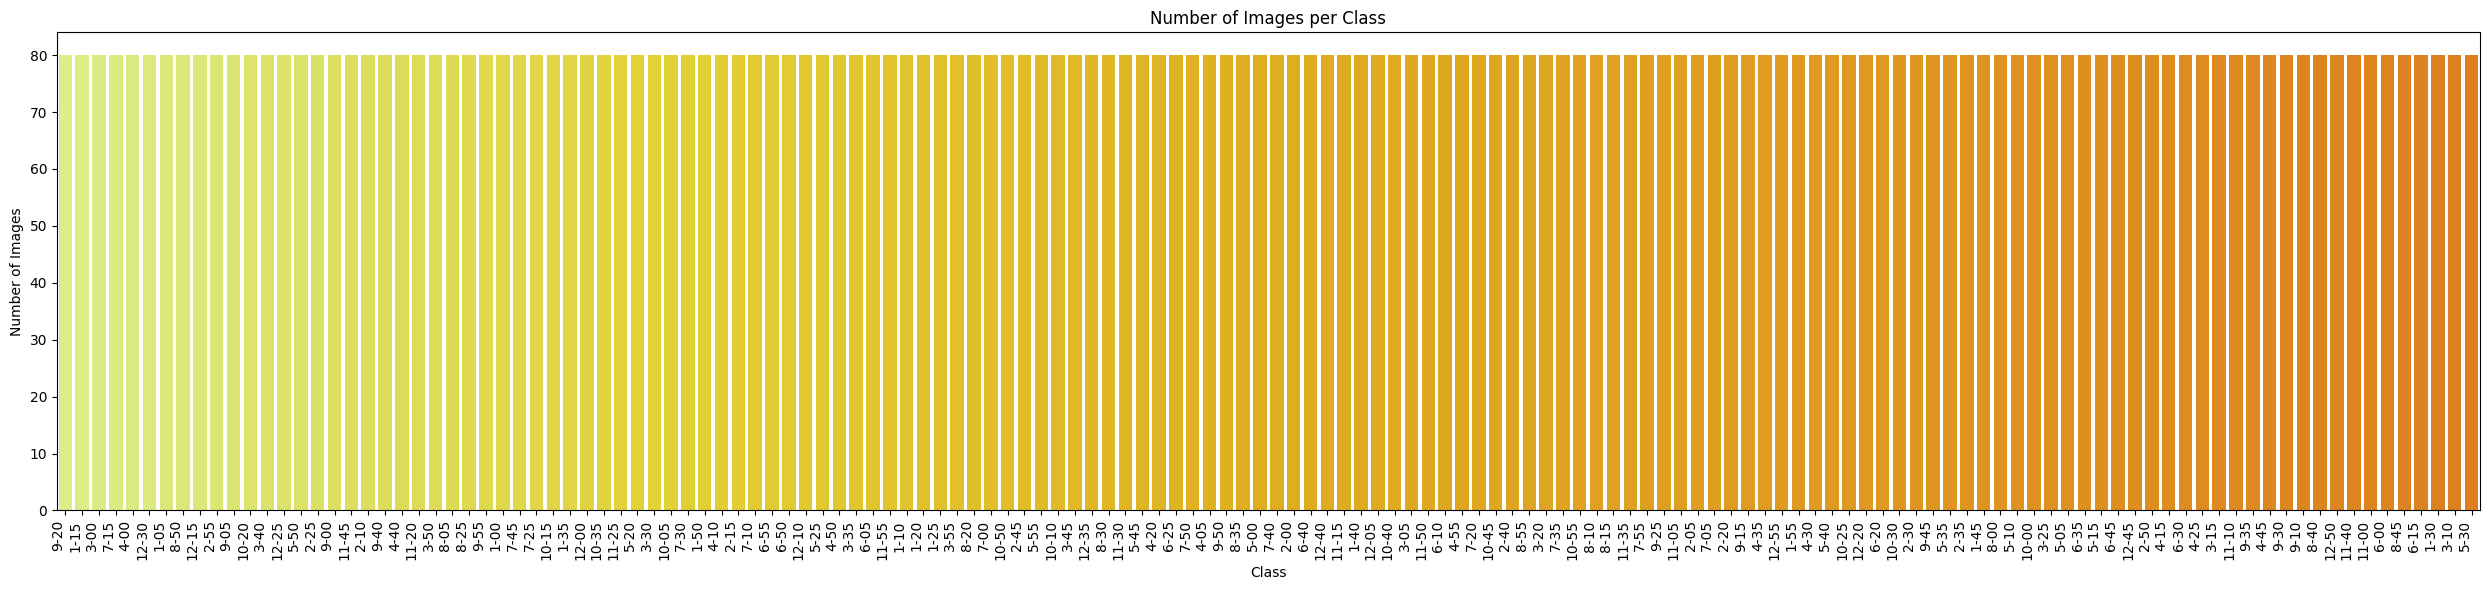

In [6]:
# Initialize a dictionary to store class counts
class_counts = {}

# Walk through the subdirectories in the train folder
for root, dirs, files in os.walk(train_image):
    for dir_name in dirs:
        # Get all image files in each class directory
        class_dir = os.path.join(root, dir_name)
        if os.path.isdir(class_dir):
            # Count the number of image files in the class directory
            image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[dir_name] = len(image_files)

# Convert the dictionary to a list of tuples for plotting
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Create a Seaborn bar chart to compare class sizes
plt.figure(figsize=(25, 6))
sns.barplot(x=class_names, y=image_counts, palette="Wistia")

# Customize the plot
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=90, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

# Compare Each Class Length from Valid Dataset

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


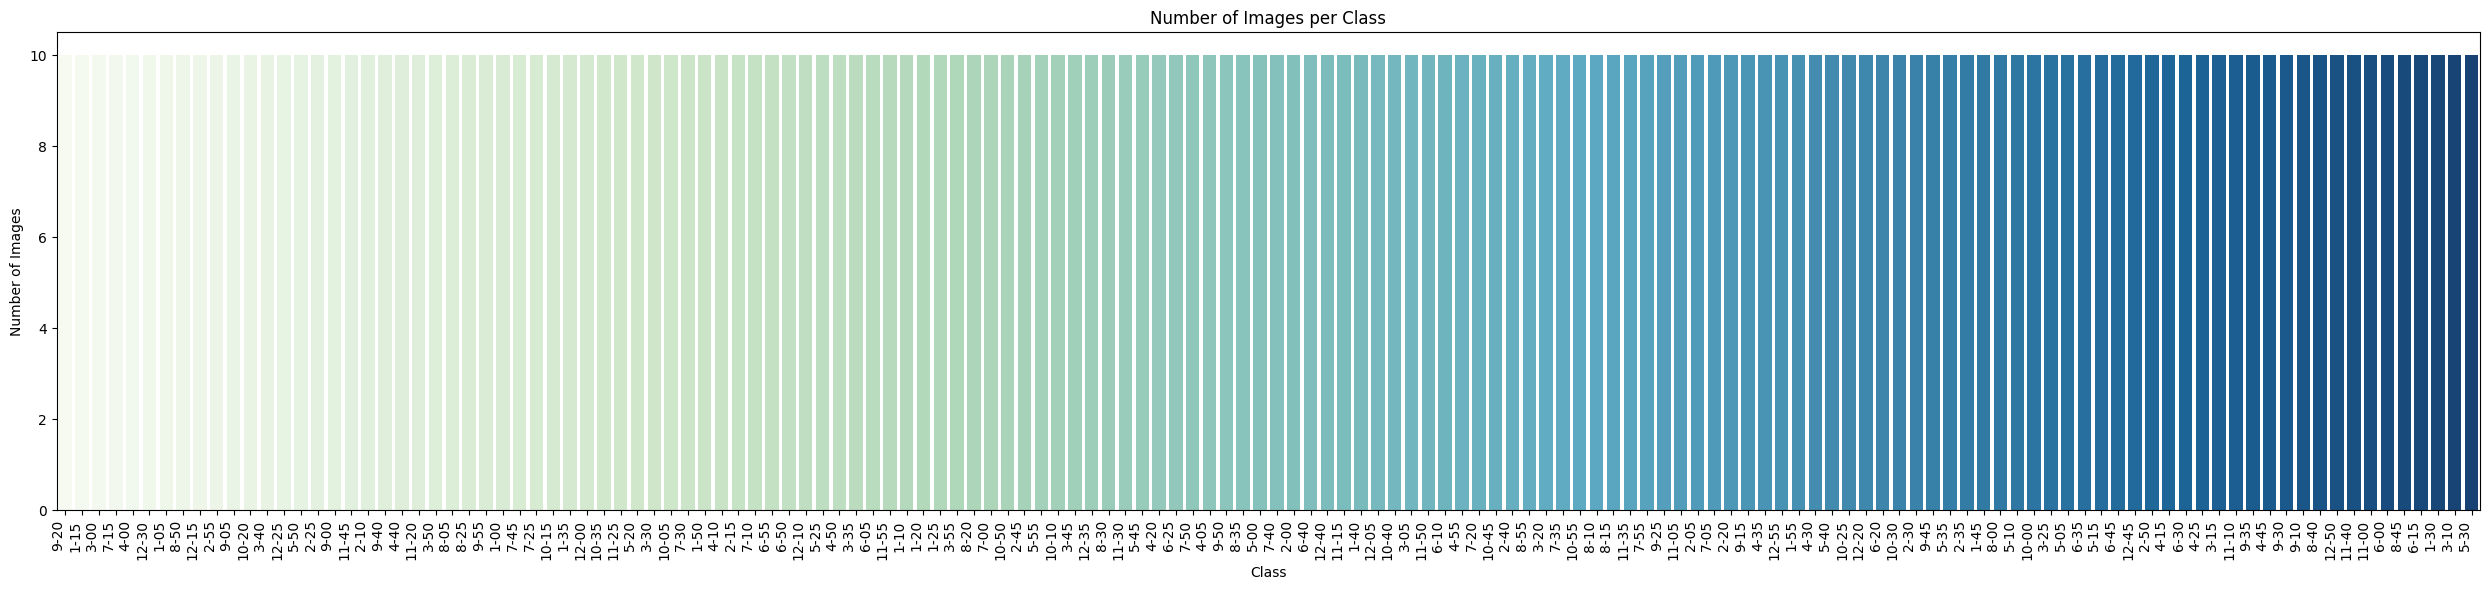

In [7]:
# Initialize a dictionary to store class counts
class_counts = {}

# Walk through the subdirectories in the train folder
for root, dirs, files in os.walk(valid_image):
    for dir_name in dirs:
        # Get all image files in each class directory
        class_dir = os.path.join(root, dir_name)
        if os.path.isdir(class_dir):
            # Count the number of image files in the class directory
            image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[dir_name] = len(image_files)

# Convert the dictionary to a list of tuples for plotting
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Create a Seaborn bar chart to compare class sizes
plt.figure(figsize=(25, 6))
sns.barplot(x=class_names, y=image_counts, palette="GnBu")

# Customize the plot
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=90, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

# Compare Each Class Length from Test Dataset

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


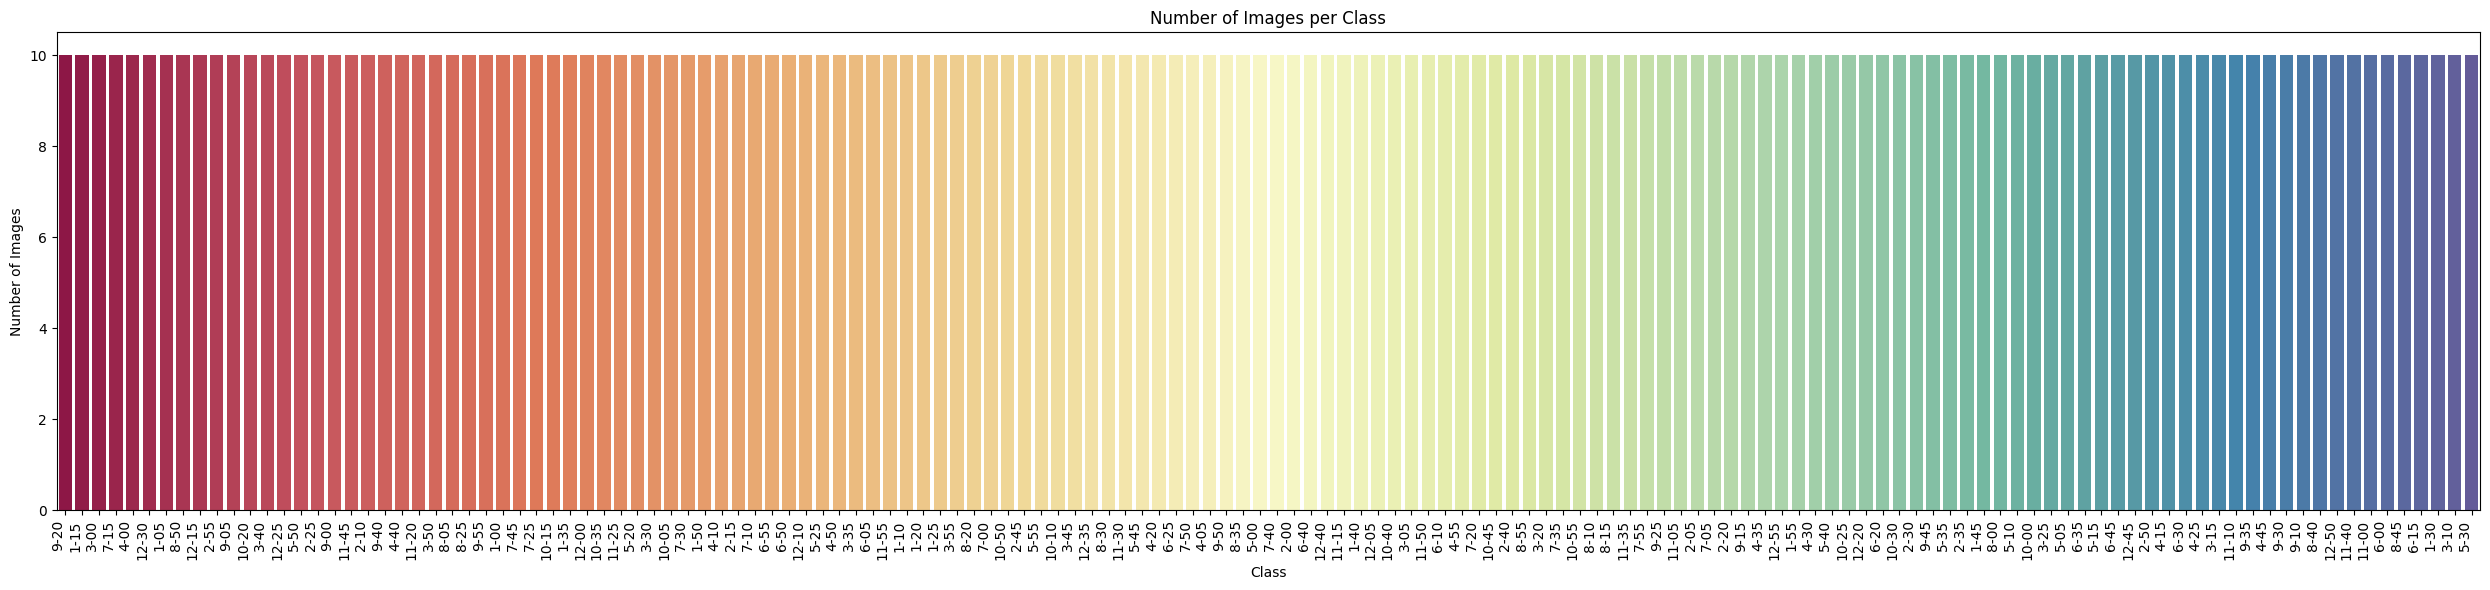

In [8]:
# Initialize a dictionary to store class counts
class_counts = {}

# Walk through the subdirectories in the train folder
for root, dirs, files in os.walk(test_image):
    for dir_name in dirs:
        # Get all image files in each class directory
        class_dir = os.path.join(root, dir_name)
        if os.path.isdir(class_dir):
            # Count the number of image files in the class directory
            image_files = [f for f in os.listdir(class_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            class_counts[dir_name] = len(image_files)

# Convert the dictionary to a list of tuples for plotting
class_names = list(class_counts.keys())
image_counts = list(class_counts.values())

# Create a Seaborn bar chart to compare class sizes
plt.figure(figsize=(25, 6))
sns.barplot(x=class_names, y=image_counts, palette="Spectral")

# Customize the plot
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=90, ha="right")

# Show the plot
plt.tight_layout()
plt.show()

# Configure the hyperparameters

In [9]:
learning_rate=0.001
weight_decay=0.0001
batch_size=256
num_epochs=100
image_size=150

patch_size=6
num_patches=(image_size//patch_size)**2
projection_dim=64
num_heads=4
input_shape = (150,150, 3)
transformer_units=[projection_dim*2,projection_dim]

transformer_layers=12

mlp_head_units=[2048,1024]

# Create DataGen

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255)

valid_datagen=ImageDataGenerator(rescale=1./255)

test_datagen=ImageDataGenerator(rescale=1./255)

# Create Dataset

In [11]:
train_generator=train_datagen.flow_from_directory(train_image,target_size=(image_size,image_size),
                                                  batch_size=32,class_mode="sparse")

valid_generator=valid_datagen.flow_from_directory(valid_image,target_size=(image_size,image_size),
                                                  batch_size=32,class_mode="sparse")

test_generator=test_datagen.flow_from_directory(test_image,target_size=(image_size,image_size),
                                                  batch_size=32,class_mode="sparse")

Found 11520 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.
Found 1440 images belonging to 144 classes.


In [12]:
num_classes=len(train_generator.class_indices)
class_names = list(train_generator.class_indices.keys())
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

Number of classes: 144
Class names: ['1-00', '1-05', '1-10', '1-15', '1-20', '1-25', '1-30', '1-35', '1-40', '1-45', '1-50', '1-55', '10-00', '10-05', '10-10', '10-15', '10-20', '10-25', '10-30', '10-35', '10-40', '10-45', '10-50', '10-55', '11-00', '11-05', '11-10', '11-15', '11-20', '11-25', '11-30', '11-35', '11-40', '11-45', '11-50', '11-55', '12-00', '12-05', '12-10', '12-15', '12-20', '12-25', '12-30', '12-35', '12-40', '12-45', '12-50', '12-55', '2-00', '2-05', '2-10', '2-15', '2-20', '2-25', '2-30', '2-35', '2-40', '2-45', '2-50', '2-55', '3-00', '3-05', '3-10', '3-15', '3-20', '3-25', '3-30', '3-35', '3-40', '3-45', '3-50', '3-55', '4-00', '4-05', '4-10', '4-15', '4-20', '4-25', '4-30', '4-35', '4-40', '4-45', '4-50', '4-55', '5-00', '5-05', '5-10', '5-15', '5-20', '5-25', '5-30', '5-35', '5-40', '5-45', '5-50', '5-55', '6-00', '6-05', '6-10', '6-15', '6-20', '6-25', '6-30', '6-35', '6-40', '6-45', '6-50', '6-55', '7-00', '7-05', '7-10', '7-15', '7-20', '7-25', '7-30', '7-35',

In [13]:
image_batch, labels = next(train_generator)
print("Batch shape (should end with 3 for RGB):", image_batch.shape)
print("Number of classes:", len(train_generator.class_indices))
print("Class names:", list(train_generator.class_indices.keys()))
print("Sample image min value:", np.min(image_batch[0]))
print("Sample image max value:", np.max(image_batch[0]))

Batch shape (should end with 3 for RGB): (32, 150, 150, 3)
Number of classes: 144
Class names: ['1-00', '1-05', '1-10', '1-15', '1-20', '1-25', '1-30', '1-35', '1-40', '1-45', '1-50', '1-55', '10-00', '10-05', '10-10', '10-15', '10-20', '10-25', '10-30', '10-35', '10-40', '10-45', '10-50', '10-55', '11-00', '11-05', '11-10', '11-15', '11-20', '11-25', '11-30', '11-35', '11-40', '11-45', '11-50', '11-55', '12-00', '12-05', '12-10', '12-15', '12-20', '12-25', '12-30', '12-35', '12-40', '12-45', '12-50', '12-55', '2-00', '2-05', '2-10', '2-15', '2-20', '2-25', '2-30', '2-35', '2-40', '2-45', '2-50', '2-55', '3-00', '3-05', '3-10', '3-15', '3-20', '3-25', '3-30', '3-35', '3-40', '3-45', '3-50', '3-55', '4-00', '4-05', '4-10', '4-15', '4-20', '4-25', '4-30', '4-35', '4-40', '4-45', '4-50', '4-55', '5-00', '5-05', '5-10', '5-15', '5-20', '5-25', '5-30', '5-35', '5-40', '5-45', '5-50', '5-55', '6-00', '6-05', '6-10', '6-15', '6-20', '6-25', '6-30', '6-35', '6-40', '6-45', '6-50', '6-55', '7-0

# Define data augmentation as a part of the model

In [14]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
    ],
    name="data_augmentation"
)


# Implement multilayer perceptron (MLP)

In [15]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

# Implement patch creation as a layer

In [16]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(patches,(batch_size,num_patches_h * num_patches_w,self.patch_size * self.patch_size * channels))
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config

# Let's display patches for a sample image

Image min value: 0.0
Image max value: 1.0


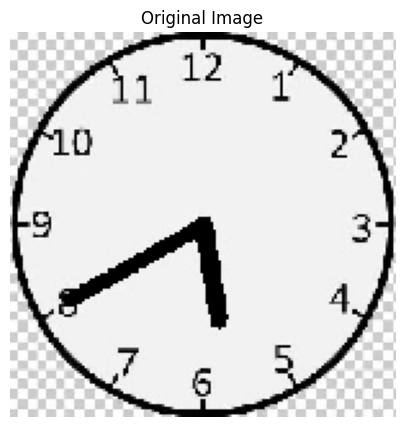

Image size: 150 X 150
Patch size: 6 X 6
Patches per image: 625
Elements per patch: 108


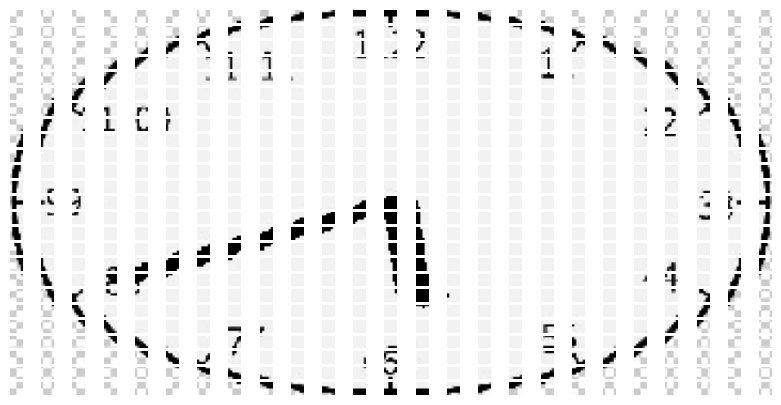

In [17]:
image_batch, _ = next(train_generator)

# Select a random image from the batch
random_idx = np.random.choice(range(image_batch.shape[0]))
image = image_batch[random_idx]

# Check the image data range
print("Image min value:", np.min(image))
print("Image max value:", np.max(image))

# Plot the original image (scale from [0, 1] to [0, 255])
plt.figure(figsize=(10, 5))
plt.imshow((image * 255).astype("uint8"))
plt.axis("off")
plt.title("Original Image")
plt.show()

# Resize the image
resized_image = ops.image.resize(ops.convert_to_tensor([image]), size=(image_size, image_size))

# Extract patches using your existing Patches class
patches = Patches(patch_size)(resized_image)

# Print shape information
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

# Plot patches in a grid
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(10, 5))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = ops.reshape(patch, (patch_size, patch_size, 3))
    patch_img_np = ops.convert_to_numpy(patch_img)
    plt.imshow((patch_img_np * 255).astype("uint8"))  
    plt.axis("off")

plt.show()

# Implement the patch encoding layer
* The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

In [18]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patch):
        positions = ops.expand_dims(ops.arange(start=0, stop=self.num_patches, step=1), axis=0)
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config

# Build the ViT model
* The ViT model consists of multiple Transformer blocks, which use the layers.MultiHeadAttention layer as a self-attention mechanism applied to the sequence of patches. The Transformer blocks produce a [batch_size, num_patches, projection_dim] tensor, which is processed via an classifier head with softmax to produce the final class probabilities output.

* Unlike the technique described in the paper, which prepends a learnable embedding to the sequence of encoded patches to serve as the image representation, all the outputs of the final Transformer block are reshaped with layers.Flatten() and used as the image representation input to the classifier head. Note that the layers.GlobalAveragePooling1D layer could also be used instead to aggregate the outputs of the Transformer block, especially when the number of patches and the projection dimensions are large.

In [19]:
def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model


# Create the model
model = create_vit_classifier()

# Define metrics and loss
metrics_1 = keras.metrics.SparseCategoricalAccuracy(name="accuracy")
metrics_2 = keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy")
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define optimizer
optimizer = keras.optimizers.AdamW(learning_rate=learning_rate, weight_decay=weight_decay)

# Compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=[metrics_1, metrics_2])

# Print model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation         │ (None, 150, 150, 3)    │              7 │ input_layer[0][0]      │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patches_1 (Patches)       │ (None, 625, 108)       │              0 │ data_augmentation[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ patch_encoder             │ (None, 625, 64)        │         46,976 │ patches_1[0][0]        │
│ (PatchEncoder)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 625, 64)        │            128 │ patch_encoder[0][0]    │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 625, 64)        │         66,368 │ layer_normalization[0… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 625, 64)        │              0 │ multi_head_attention[… │
│                           │                        │                │ patch_encoder[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 625, 64)        │            128 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 625, 128)       │          8,320 │ layer_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 625, 128)       │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 625, 64)        │          8,256 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 625, 64)        │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 625, 64)        │              0 │ dropout_2[0][0],       │
│                           │                        │                │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 625, 64)        │            128 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 625, 64)        │         66,368 │ layer_normalization_2… │
│ (MultiHeadAttention)      │                        │                │ layer_normalization_2… │
├──────────────────────

 Total params: 85,213,335 (325.06 MB)

 Trainable params: 85,213,328 (325.06 MB)

 Non-trainable params: 7 (32.00 B)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping=EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True,verbose=1)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",patience=2,min_lr=1e-6,verbose=1)

checkpoint_filepath = "/kaggle/working/checkpoint.weights.h5"
checkpoint_callback = keras.callbacks.ModelCheckpoint(checkpoint_filepath,monitor="val_accuracy",
                                                      save_best_only=True,save_weights_only=True)

history = model.fit(train_generator,epochs=num_epochs,validation_data=valid_generator,callbacks=[checkpoint_callback,reduce_lr,
                                                                                                early_stopping])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 191s 425ms/step - accuracy: 0.0067 - loss: 9.0796 - top-5-accuracy: 0.0329 - val_accuracy: 0.0069 - val_loss: 4.9699 - val_top-5-accuracy: 0.0347 - learning_rate: 0.0010
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 148s 409ms/step - accuracy: 0.0066 - loss: 4.9715 - top-5-accuracy: 0.0309 - val_accuracy: 0.0069 - val_loss: 4.9699 - val_top-5-accuracy: 0.0347 - learning_rate: 0.0010
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.0061 - loss: 4.9716 - top-5-accuracy: 0.0337
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
360/360 ━━━━━━━━━━━━━━━━━━━━ 147s 408ms/step - accuracy: 0.0061 - loss: 4.9716 - top-5-accuracy: 0.0337 - val_accuracy: 0.0069 - val_loss: 4.9699 - val_top-5-accuracy: 0.0347 - learning_rate: 0.0010
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 147s 407ms/step - accuracy: 0.0079 - loss: 4.9703 - top-5-accuracy: 0.0339 - val_accuracy: 0.0069 - val_loss: 4.9699 - val_top-5-accuracy: 0.0347 - learning_ra

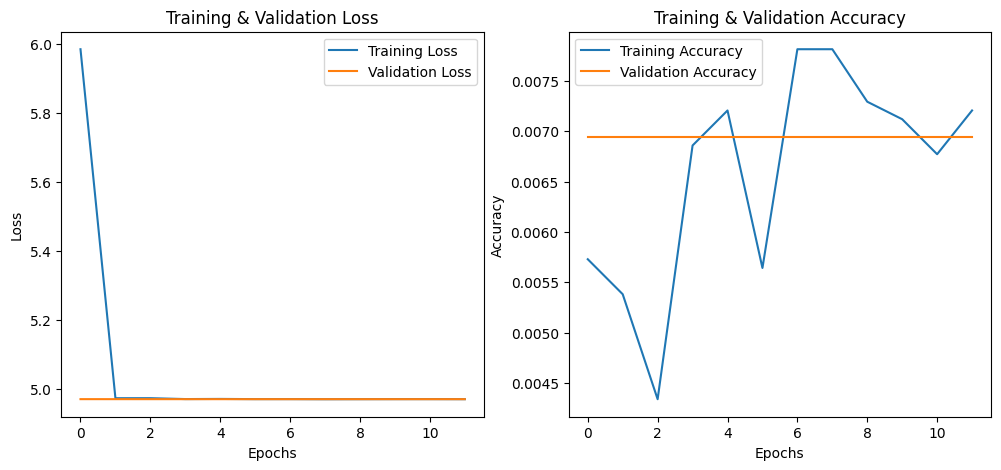

In [23]:
# Extract values from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(len(train_loss))

# Plot loss graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot accuracy graph
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

# Model Evaluation

In [24]:
result=model.evaluate(valid_generator)
print(f"Test Loss : {result[0]}")
print(f"Model Accuracy : {result[1]}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.0078 - loss: 4.9696 - top-5-accuracy: 0.0352
Test Loss : 4.969870567321777
Model Accuracy : 0.0069444444961845875


# Confusion Matrix

45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step


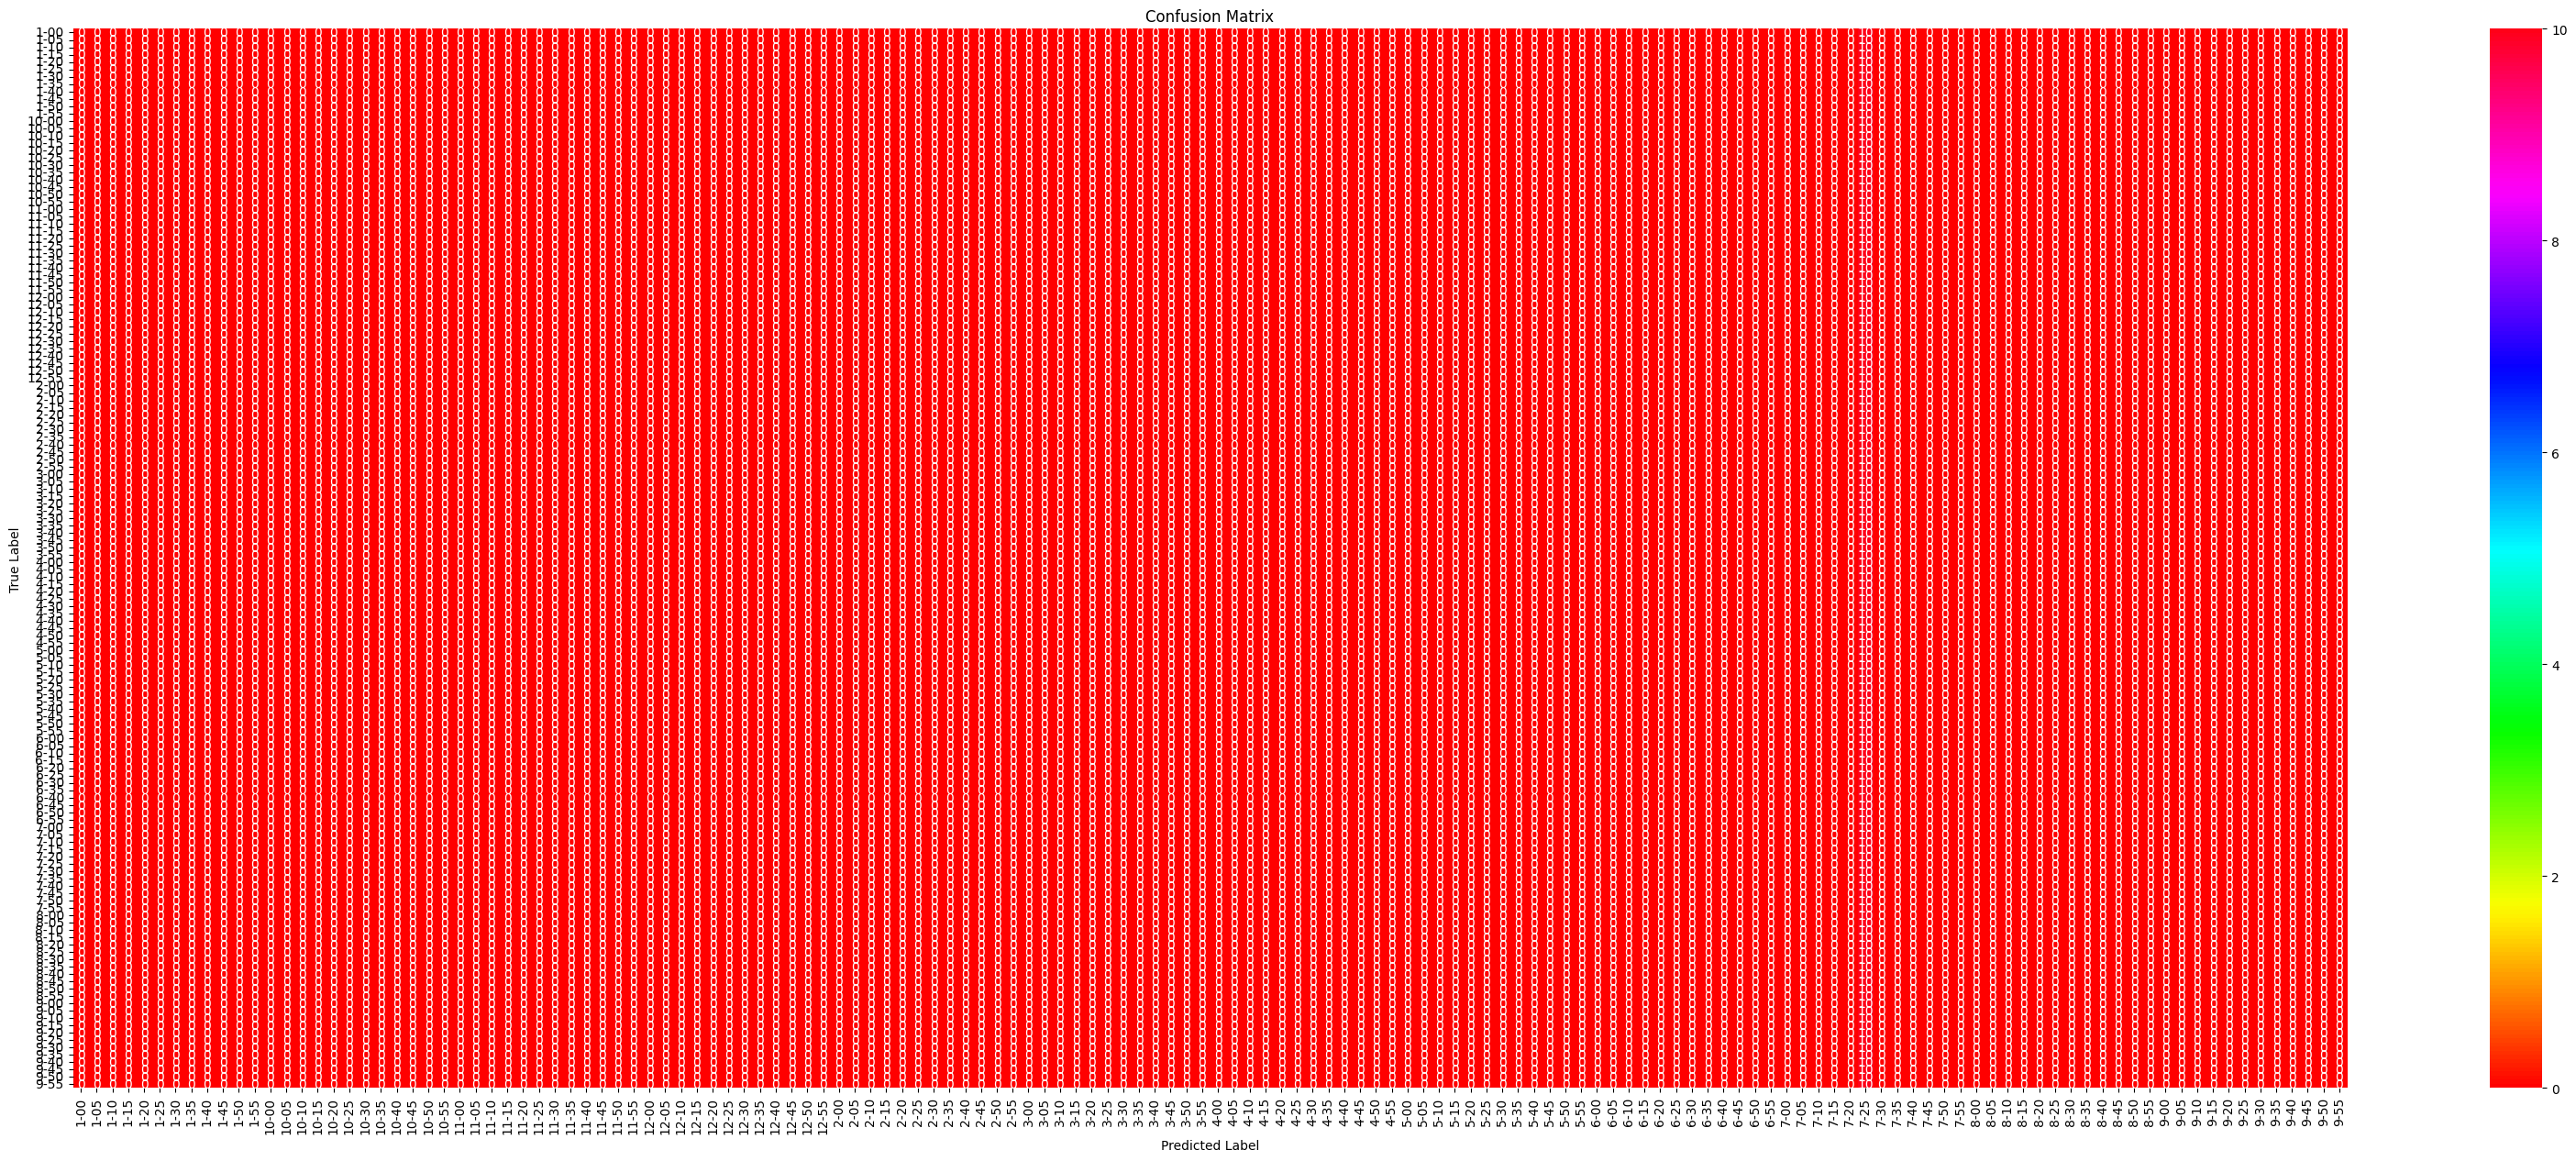

In [30]:

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  

y_true = []

for i in range(len(test_generator)):
    _, labels = test_generator[i]  
    y_true.extend(labels)  

y_true = np.array(y_true)


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(40, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='hsv', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [31]:
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.0000
Recall: 0.0069
F1-score: 0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes,target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

        1-00       0.00      0.00      0.00        10
        1-05       0.00      0.00      0.00        10
        1-10       0.00      0.00      0.00        10
        1-15       0.00      0.00      0.00        10
        1-20       0.00      0.00      0.00        10
        1-25       0.00      0.00      0.00        10
        1-30       0.00      0.00      0.00        10
        1-35       0.00      0.00      0.00        10
        1-40       0.00      0.00      0.00        10
        1-45       0.00      0.00      0.00        10
        1-50       0.00      0.00      0.00        10
        1-55       0.00      0.00      0.00        10
       10-00       0.00      0.00      0.00        10
       10-05       0.00      0.00      0.00        10
       10-10       0.00      0.00      0.00        10
       10-15       0.00      0.00      0.00        10
       10-20       0.00      0.00      0.00        10
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Performance Analysis
* This model was trained using a Vision Transformer (ViT) architecture for 12 epochs, with early stopping triggered due to stagnant validation performance. Despite using a powerful transformer-based model, the results indicate that it struggled to learn meaningful patterns from the dataset.

## Key Observations:
* The training accuracy remained very low, reaching a maximum of 0.0085 (0.85%).
* The validation accuracy plateaued at 0.0069 (0.69%), showing no signs of improvement.
* The loss values did not significantly decrease, suggesting ineffective optimization.
* Top-5 accuracy remained around 3.5%, indicating that even with multiple choices, predictions were largely incorrect.
* ReduceLROnPlateau lowered the learning rate multiple times, but this did not enhance learning.
* Early stopping restored the best model from epoch 9, but performance remained poor.
# Possible Reasons for Poor Performance:
* Inefficient Feature Learning with ViT: Unlike CNNs, Vision Transformers require large datasets to generalize well. If the dataset is small, ViTs may struggle to learn effectively.
* Data Preprocessing Issues: ViTs require well-structured image preprocessing (e.g., correct normalization, patch embedding strategies). Any inconsistency can hinder learning.
* Imbalanced Dataset: If certain classes dominate, the model may fail to learn minority class features. Using class balancing techniques could help.
* Optimization Challenges: ViTs are computationally expensive and may require fine-tuned hyperparameters (e.g., learning rate warm-up, weight decay, AdamW optimizer).
* Overfitting or Underfitting: If dropout or regularization is too aggressive, the model might underfit. Conversely, insufficient regularization may cause overfitting.
# Next Steps for Improvement:
* Use Transfer Learning: Instead of training from scratch, fine-tune a pre-trained ViT model (e.g., ViT-B/16 trained on ImageNet).
* Optimize Hyperparameters: Adjust learning rate schedules, warm-up steps, and weight decay for better convergence.
* Improve Data Augmentation: ViTs benefit from strong augmentation techniques like RandAugment or MixUp.
* Increase Training Data: If possible, augment the dataset or use self-supervised learning to enhance feature extraction.
* Consider CNN-ViT Hybrid Models: A hybrid approach combining CNN feature extraction with ViT could improve performance, especially on smaller datasets.